
# Project: Investigate a Dataset (European Soccer Database)

Muhtar Safi'i - Oct 2020

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This Project i will analyze soccer database from [Kaggle](www.kaggle.com/hugomathien/soccer&sa=D&ust=1532469042123000). This database contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

> Question : 
1. Which team had the most victories? 
2. Which team from Italy has scored the most goals??
3. Which player has the highest penalty goals?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sql



%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> I will get data with `sql engine`, query `select`
in sql. So, the dataframe in Pandas is the data that I have queryed with the columns I need.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
engine = sql.create_engine('sqlite:///database.sqlite')

df_match = \
pd.read_sql('select m.id as match_id,'\
            'l.name as league_name,'\
            'c.name as country_name,'\
            'm.season,'\
            'm.stage,'\
            'm.date,'\
            'th.team_long_name as home_team,'\
            'ta.team_long_name as away_team,'\
            'home_team_goal,'\
            'away_team_goal '\
            'from Match m '\
            'left join league l on l.id = m.league_id '\
            'left join team th on th.team_api_id = m.home_team_api_id '\
            'left join team ta on ta.team_api_id = m.away_team_api_id '\
            'left join country c on c.id = m.country_id ', engine)

df_player = \
pd.read_sql('select p.player_name,p.birthday,p.height,p.weight,pa.* '\
            'from Player p '\
            'left join Player_Attributes pa on pa.player_api_id = p.player_api_id', engine)
df_team_att = pd.read_sql('select team_long_name, ta.* '\
                          'from team_attributes ta '\
                          'left join team t on t.team_api_id = ta.team_api_id', engine)


In [3]:
df_match.head()

,match_id,league_name,country_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,2,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,5,Belgium Jupiler League,Belgium,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


In [4]:
df_player.head()

,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
2,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
4,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [5]:
df_team_att.head()

,team_long_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Aarau,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,FC Aarau,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,FC Aarau,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,Aberdeen,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,Aberdeen,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [6]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
match_id          25979 non-null int64
league_name       25979 non-null object
country_name      25979 non-null object
season            25979 non-null object
stage             25979 non-null int64
date              25979 non-null object
home_team         25979 non-null object
away_team         25979 non-null object
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
dtypes: int64(4), object(6)
memory usage: 2.0+ MB


In [7]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 46 columns):
player_name            183978 non-null object
birthday               183978 non-null object
height                 183978 non-null float64
weight                 183978 non-null int64
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve     

In [8]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
team_long_name                    1458 non-null object
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooti

In [9]:
df_match.dropna(inplace=True)
df_player.dropna(inplace=True)
df_team_att.dropna(inplace=True)

In [10]:
sum(df_match.duplicated())

0

In [11]:
sum(df_player.duplicated())

0

In [12]:
sum(df_team_att.duplicated())

0

### Data Cleaning (df_match)

##### Select Columns that is needed

In [13]:
df_match_team = df_match[['match_id','country_name','home_team','away_team','home_team_goal','away_team_goal']]

In [14]:
df_match_team

,match_id,country_name,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,KRC Genk,Beerschot AC,1,1
1,2,Belgium,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,KAA Gent,RAEC Mons,5,0
4,5,Belgium,FCV Dender EH,Standard de Liège,1,3
...,...,...,...,...,...,...
25974,25975,Switzerland,FC St. Gallen,FC Thun,1,0
25975,25976,Switzerland,FC Vaduz,FC Luzern,1,2
25976,25977,Switzerland,Grasshopper Club Zürich,FC Sion,2,0
25977,25978,Switzerland,Lugano,FC Zürich,0,0


##### add a new column to describe which team won

In [15]:
df_match_team.loc[df_match_team['home_team_goal'] > df_match_team['away_team_goal'], 'winner'] = df_match_team['home_team']
df_match_team.loc[df_match_team['home_team_goal'] < df_match_team['away_team_goal'], 'winner'] = df_match_team['away_team']
df_match_team.loc[df_match_team['home_team_goal'] == df_match_team['away_team_goal'], 'winner'] = 'draw'
df_match_team.loc[0:,'win']=1
df_match_team.head()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,match_id,country_name,home_team,away_team,home_team_goal,away_team_goal,winner,win
0,1,Belgium,KRC Genk,Beerschot AC,1,1,draw,1
1,2,Belgium,SV Zulte-Waregem,Sporting Lokeren,0,0,draw,1
2,3,Belgium,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht,1
3,4,Belgium,KAA Gent,RAEC Mons,5,0,KAA Gent,1
4,5,Belgium,FCV Dender EH,Standard de Liège,1,3,Standard de Liège,1


##### group by team and sum of win

In [16]:
df_match_victories=df_match_team[df_match_team['winner']!='draw']
vic=df_match_victories.groupby(['winner'], as_index=False).sum()
vic=vic[['winner','win','home_team_goal','away_team_goal']]
vic.head()

,winner,win,home_team_goal,away_team_goal
0,1. FC Kaiserslautern,17,29,24
1,1. FC Köln,60,91,81
2,1. FC Nürnberg,49,85,59
3,1. FSV Mainz 05,88,160,108
4,AC Ajaccio,22,35,23


##### group by team, filter the country of Italy and sum of home_team_goal to find all home_team_goal for each team from italia

In [17]:
df_home_goal = df_match_team[df_match_team['country_name']=='Italy']
df_home_goal = df_home_goal.groupby(['home_team'], as_index=False).sum()
df_home_goal.rename(columns={"home_team": "team", "home_team_goal": "goal"},inplace=True)
df_home_goal=df_home_goal[['team','goal']]
df_home_goal.head()

,team,goal
0,Atalanta,170
1,Bari,42
2,Bologna,155
3,Brescia,22
4,Cagliari,181


##### group by team, filter the country of Italy and sum of away_team_goal to find all away_team_goal for each team from italia

In [18]:
df_away_goal = df_match_team[df_match_team['country_name']=='Italy']
df_away_goal = df_away_goal.groupby(['away_team'], as_index=False).sum()
df_away_goal.rename(columns={"away_team": "team", "away_team_goal": "goal"},inplace=True)
df_away_goal=df_away_goal[['team','goal']]
df_away_goal.head()

,team,goal
0,Atalanta,113
1,Bari,34
2,Bologna,108
3,Brescia,12
4,Cagliari,128


##### append home team goal and away team goal

In [19]:
df_goal = df_home_goal.append([df_away_goal])
df_goal.head()

,team,goal
0,Atalanta,170
1,Bari,42
2,Bologna,155
3,Brescia,22
4,Cagliari,181


##### Add up the home goals and away goals for each team after append data by group by

In [20]:
df_goal = df_goal.groupby(['team'], as_index=False).sum()
df_goal

,team,goal
0,Atalanta,283
1,Bari,76
2,Bologna,263
3,Brescia,34
4,Cagliari,309
5,Carpi,37
6,Catania,251
7,Cesena,98
8,Chievo Verona,285
9,Empoli,86


### Data Cleaning (df_player)

##### Select Columns that is needed 

In [21]:
## I am using player_api_id because it is a unique id
df_player_hs = df_player[['player_api_id','player_name','penalties']]
df_player_hs['player_api_id']=df_player_hs['player_api_id'].astype(str)
df_player_hs.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,player_api_id,player_name,penalties
0,505942,Aaron Appindangoye,47.0
1,505942,Aaron Appindangoye,47.0
2,505942,Aaron Appindangoye,48.0
3,505942,Aaron Appindangoye,48.0
4,505942,Aaron Appindangoye,48.0


<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the data, I started to analyze the data to answer questions.

### Research Question 1 (Which team had the most victories?!)

In [22]:
# sort by total winnings and take the top 10
vic = vic.sort_values(by='win', ascending=False).head(10)
vic

,winner,win,home_team_goal,away_team_goal
75,FC Barcelona,234,534,375
211,Real Madrid CF,228,554,397
49,Celtic,218,405,300
77,FC Bayern Munich,193,400,286
162,Manchester United,192,351,242
133,Juventus,189,289,236
232,SL Benfica,185,338,261
89,FC Porto,183,321,256
15,Ajax,181,377,256
76,FC Basel,180,364,266


Text(0, 0.5, 'win')

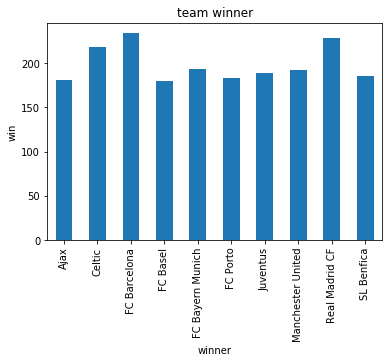

In [23]:
# create bar chart
vic.groupby('winner')['win'].sum().plot(kind='bar', title='team winner');
plt.xlabel('winner')
plt.ylabel('win')

##### team attributes from 1st winner

In [24]:
# take 1st winner team
winner_first = vic.sort_values(by='win', ascending=False).head(1)
winner_first


,winner,win,home_team_goal,away_team_goal
75,FC Barcelona,234,534,375


In [25]:
# join to team_attributes dataframe
winner_first=winner_first.merge(df_team_att, left_on='winner', right_on='team_long_name')
winner_first

,winner,win,home_team_goal,away_team_goal,team_long_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Barcelona,234,534,375,FC Barcelona,123,241,8634,2014-09-19 00:00:00,35,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover
1,FC Barcelona,234,534,375,FC Barcelona,124,241,8634,2015-09-10 00:00:00,36,...,56,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover


In [26]:
# save to csv file
winner_first.to_csv('winner_first.csv',index=False,sep ='|')

### Research Question 2  (Which team from Italy has scored the most goals?)

In [27]:
# sort by total goals for each team and take the top 10
df_goal = df_goal.sort_values(by='goal', ascending=False).head(10)
df_goal

,team,goal
15,Juventus,543
26,Roma,530
20,Napoli,514
19,Milan,496
14,Inter,496
10,Fiorentina,440
16,Lazio,417
31,Udinese,415
12,Genoa,392
22,Palermo,351


Text(0, 0.5, 'goal')

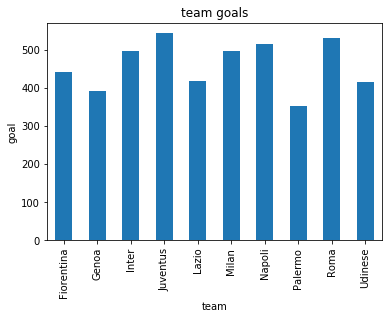

In [28]:
# create bar chart
df_goal.groupby('team')['goal'].sum().plot(kind='bar', title='team goals');
plt.xlabel('team')
plt.ylabel('goal')

##### the team attribute of the Italian team with the most goals

In [29]:
# take team with the most goals
most_goals = df_goal.sort_values(by='goal', ascending=False).head(1)
most_goals


,team,goal
15,Juventus,543


In [30]:
# join to team_attributes dataframe
most_goals=most_goals.merge(df_team_att, left_on='team', right_on='team_long_name')
most_goals

,team,goal,team_long_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,Juventus,543,Juventus,629,45,9885,2014-09-19 00:00:00,26,Slow,47.0,...,72,Lots,Organised,23,Deep,67,Double,36,Normal,Cover
1,Juventus,543,Juventus,630,45,9885,2015-09-10 00:00:00,50,Balanced,35.0,...,80,Lots,Organised,35,Medium,65,Press,35,Normal,Cover


In [31]:
# save to csv file
most_goals.to_csv('most_goals.csv',index=False,sep ='|')

### Research Question 3  (Which player has the highest penalty goals?)

In [32]:
# group by total penalty goals for each player
df_player_hs=df_player_hs.groupby(['player_name','player_api_id'], as_index=False).sum()
df_player_hs

,player_name,player_api_id,penalties
0,Aaron Appindangoye,505942,238.0
1,Aaron Cresswell,155782,1753.0
2,Aaron Doran,162549,1574.0
3,Aaron Galindo,30572,960.0
4,Aaron Hughes,23780,1324.0
...,...,...,...
10405,Zoumana Camara,26357,722.0
10406,Zsolt Laczko,111182,830.0
10407,Zvjezdan Misimovic,39902,709.0
10408,de Oliveira Cleber Monteiro,11833,478.0


In [33]:
# sort by total goals for each team and take the top 10
df_player_hs = df_player_hs.sort_values(by='penalties', ascending=False).head(1)
df_player_hs

,player_name,player_api_id,penalties
371,Alessio Cerci,41269,4314.0


<a id='conclusions'></a>
## Conclusions


1. Which team had the most victories?
> FC Barcelona with 234 win, 534 home team goals, and 375 away team goals.
2. Which team from Italy has scored the most goals??
> Juventus with 543 goals.
3. Which player has the highest penalty goals?
> Alessio Cerci with 4314 penalties.

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1